<a href="https://colab.research.google.com/github/gaurav1210/LAB-EXPERIMENT/blob/main/SPECTRA_DARK_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

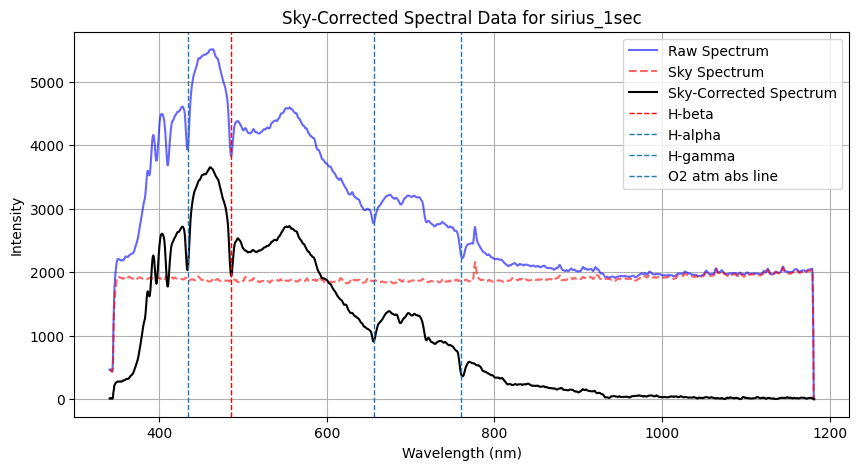

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt

def read_spectrum(file_path):
    """Reads a .ssm file and extracts wavelength and intensity."""
    wavelengths, intensities = [], []

    with open(file_path, "r") as file:
        for line in file:
            if line.startswith('"'):  # Ignore metadata lines
                continue
            parts = line.strip().split()
            if len(parts) == 2:
                try:
                    wavelength = float(parts[0])
                    intensity = float(parts[1])
                    wavelengths.append(wavelength)
                    intensities.append(intensity)
                except ValueError:
                    pass  # Skip invalid lines

    return np.array(wavelengths), np.array(intensities)

# File paths
spectrum_file = "/content/sirius_1sec_1.SSM"
dark_file = "/content/sirius_sky_1sec_1.SSM"
# Read data
wavelengths_spectrum, intensities_spectrum = read_spectrum(spectrum_file)
wavelengths_dark, intensities_dark = read_spectrum(dark_file)

# Ensure both files have the same wavelength points
if not np.array_equal(wavelengths_spectrum, wavelengths_dark):
    print("Error: Wavelengths do not match between spectrum and dark file.")
    exit()

# Perform dark subtraction
corrected_intensities = intensities_spectrum - intensities_dark

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_spectrum, intensities_spectrum, label="Raw Spectrum", color="blue", alpha=0.6)
plt.plot(wavelengths_dark, intensities_dark, label="Sky Spectrum", color="red", linestyle="dashed", alpha=0.6)
plt.plot(wavelengths_spectrum, corrected_intensities, label="Sky-Corrected Spectrum", color="black")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Sky-Corrected Spectral Data for sirius_1sec")
plt.axvline(486, color = 'r' , linestyle='dashed', linewidth=1, label='H-beta')
plt.axvline(656,  linestyle='dashed', linewidth=1, label='H-alpha')
plt.axvline(434,  linestyle='dashed', linewidth=1, label='H-gamma')
plt.axvline(760,  linestyle='dashed', linewidth=1, label='O2 atm abs line')

plt.legend()
# plt.axis([0, 1000, 0, 1000])

gridx = np.linspace(300,1000,20)
plt.grid()
# majorLocator   = MultipleLocator(20)
plt.show()



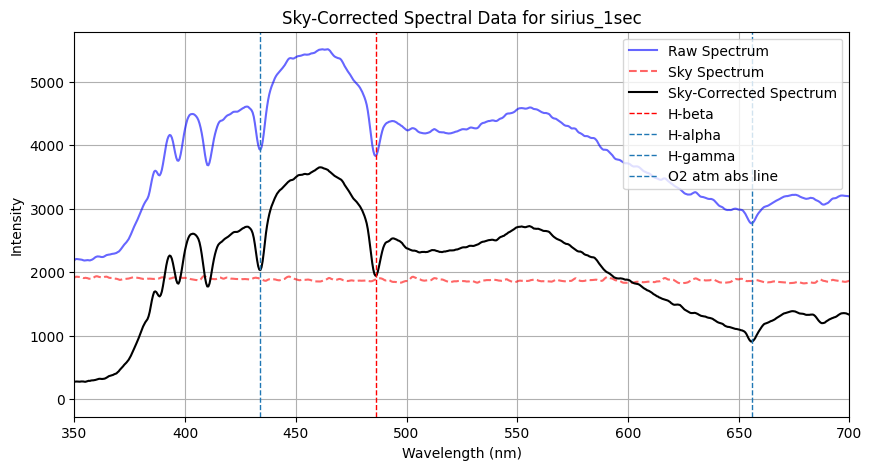

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_spectrum(file_path):
    """Reads a .ssm file and extracts wavelength and intensity."""
    wavelengths, intensities = [], []

    with open(file_path, "r") as file:
        for line in file:
            if line.startswith('"'):  # Ignore metadata lines
                continue
            parts = line.strip().split()
            if len(parts) == 2:
                try:
                    wavelength = float(parts[0])
                    intensity = float(parts[1])
                    wavelengths.append(wavelength)
                    intensities.append(intensity)
                except ValueError:
                    pass  # Skip invalid lines

    return np.array(wavelengths), np.array(intensities)

# File paths
#spectrum_file = "sirius_1sec_1.SSM"
#dark_file = "sirius_sky_1sec_1.SSM"
spectrum_file = "/content/sirius_1sec_1.SSM"
dark_file = "/content/sirius_sky_1sec_1.SSM"
# Read data
wavelengths_spectrum, intensities_spectrum = read_spectrum(spectrum_file)
wavelengths_dark, intensities_dark = read_spectrum(dark_file)

# Ensure both files have the same wavelength points
if not np.array_equal(wavelengths_spectrum, wavelengths_dark):
    print("Error: Wavelengths do not match between spectrum and dark file.")
    exit()

# Perform dark subtraction
corrected_intensities = intensities_spectrum - intensities_dark

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_spectrum, intensities_spectrum, label="Raw Spectrum", color="blue", alpha=0.6)
plt.plot(wavelengths_dark, intensities_dark, label="Sky Spectrum", color="red", linestyle="dashed", alpha=0.6)
plt.plot(wavelengths_spectrum, corrected_intensities, label="Sky-Corrected Spectrum", color="black")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Sky-Corrected Spectral Data for sirius_1sec")
plt.axvline(486, color = 'r' , linestyle='dashed', linewidth=1, label='H-beta')
plt.axvline(656,  linestyle='dashed', linewidth=1, label='H-alpha')
plt.axvline(434,  linestyle='dashed', linewidth=1, label='H-gamma')
plt.axvline(760,  linestyle='dashed', linewidth=1, label='O2 atm abs line')

# Set x-axis limits to 350 nm to 700 nm
plt.xlim(350, 700)

plt.legend()
plt.grid()
plt.show()

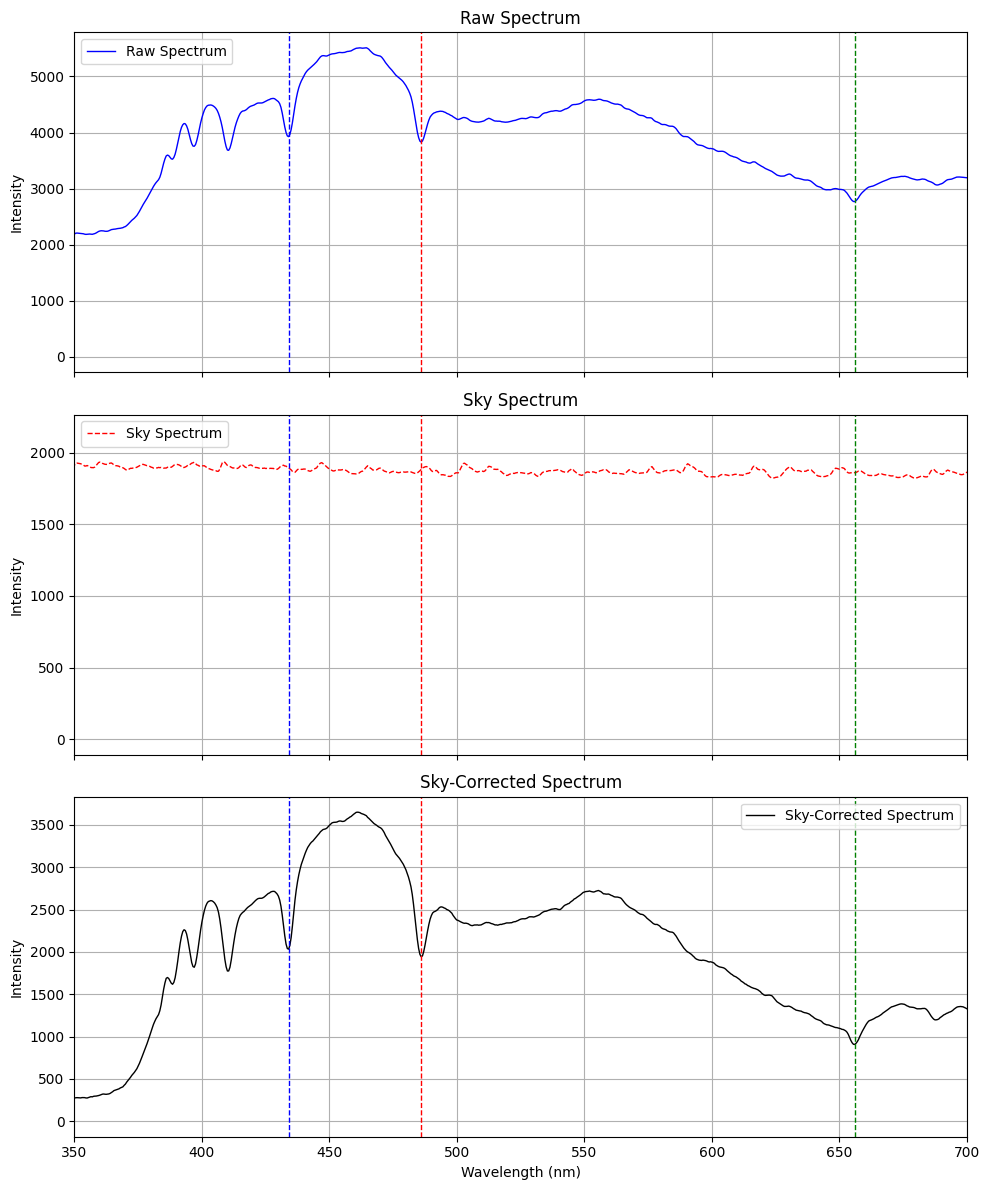

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_spectrum(file_path):
    """Reads a .ssm file and extracts wavelength and intensity."""
    wavelengths, intensities = [], []

    with open(file_path, "r") as file:
        for line in file:
            if line.startswith('"'):  # Ignore metadata lines
                continue
            parts = line.strip().split()
            if len(parts) == 2:
                try:
                    wavelength = float(parts[0])
                    intensity = float(parts[1])
                    wavelengths.append(wavelength)
                    intensities.append(intensity)
                except ValueError:
                    pass  # Skip invalid lines

    return np.array(wavelengths), np.array(intensities)

# File paths
#spectrum_file = "sirius_1sec_1.SSM"
#dark_file = "sirius_sky_1sec_1.SSM"
spectrum_file = "/content/sirius_1sec_1.SSM"
dark_file = "/content/sirius_sky_1sec_1.SSM"
# Read data
wavelengths_spectrum, intensities_spectrum = read_spectrum(spectrum_file)
wavelengths_dark, intensities_dark = read_spectrum(dark_file)

# Ensure both files have the same wavelength points
if not np.array_equal(wavelengths_spectrum, wavelengths_dark):
    print("Error: Wavelengths do not match between spectrum and dark file.")
    exit()

# Perform dark subtraction
corrected_intensities = intensities_spectrum - intensities_dark

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot Raw Spectrum
ax1.plot(wavelengths_spectrum, intensities_spectrum, label="Raw Spectrum", color="blue", linewidth=1)
ax1.set_title("Raw Spectrum")
ax1.set_ylabel("Intensity")
ax1.legend()
ax1.grid(True)

# Plot Sky Spectrum
ax2.plot(wavelengths_dark, intensities_dark, label="Sky Spectrum", color="red", linestyle="--", linewidth=1)
ax2.set_title("Sky Spectrum")
ax2.set_ylabel("Intensity")
ax2.legend()
ax2.grid(True)

# Plot Sky-Corrected Spectrum
ax3.plot(wavelengths_spectrum, corrected_intensities, label="Sky-Corrected Spectrum", color="black", linewidth=1)
ax3.set_title("Sky-Corrected Spectrum")
ax3.set_xlabel("Wavelength (nm)")
ax3.set_ylabel("Intensity")
ax3.legend()
ax3.grid(True)

# Add vertical lines for spectral features
for ax in [ax1, ax2, ax3]:
    ax.axvline(486, color='r', linestyle='dashed', linewidth=1, label='H-beta' if ax == ax1 else "")
    ax.axvline(656, color='g', linestyle='dashed', linewidth=1, label='H-alpha' if ax == ax1 else "")
    ax.axvline(434, color='b', linestyle='dashed', linewidth=1, label='H-gamma' if ax == ax1 else "")
    ax.axvline(760, color='purple', linestyle='dashed', linewidth=1, label='O2 atm abs line' if ax == ax1 else "")

# Set x-axis limits to 350 nm to 700 nm
plt.xlim(350, 700)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

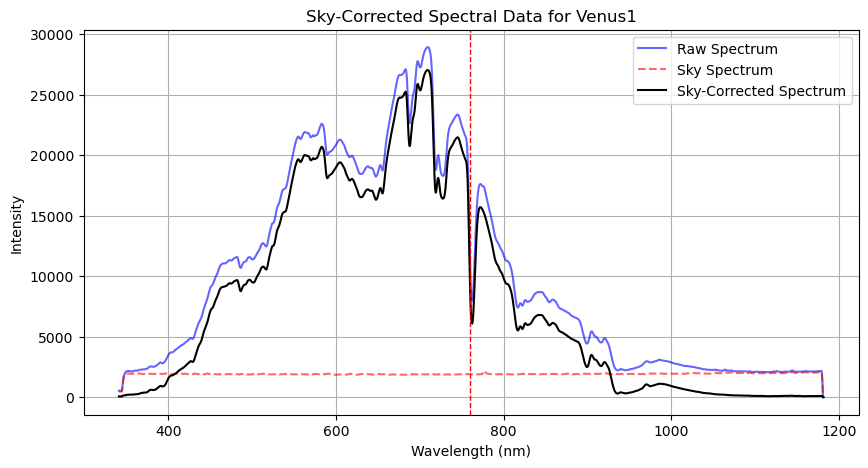

In [ ]:

# File paths
spectrum_file = "Venus1.SSM"
dark_file = "Venus_sky_1sec_1.SSM"
# Read data
wavelengths_spectrum, intensities_spectrum = read_spectrum(spectrum_file)
wavelengths_dark, intensities_dark = read_spectrum(dark_file)

# Ensure both files have the same wavelength points
if not np.array_equal(wavelengths_spectrum, wavelengths_dark):
    print("Error: Wavelengths do not match between spectrum and dark file.")
    exit()

# Perform dark subtraction
corrected_intensities = intensities_spectrum - intensities_dark

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_spectrum, intensities_spectrum, label="Raw Spectrum", color="blue", alpha=0.6)
plt.plot(wavelengths_dark, intensities_dark, label="Sky Spectrum", color="red", linestyle="dashed", alpha=0.6)
plt.plot(wavelengths_spectrum, corrected_intensities, label="Sky-Corrected Spectrum", color="black")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Sky-Corrected Spectral Data for Venus1")
plt.legend()
plt.axvline(760, color='r', linestyle='dashed', linewidth=1, label='abs line')

plt.grid(True)
plt.show()



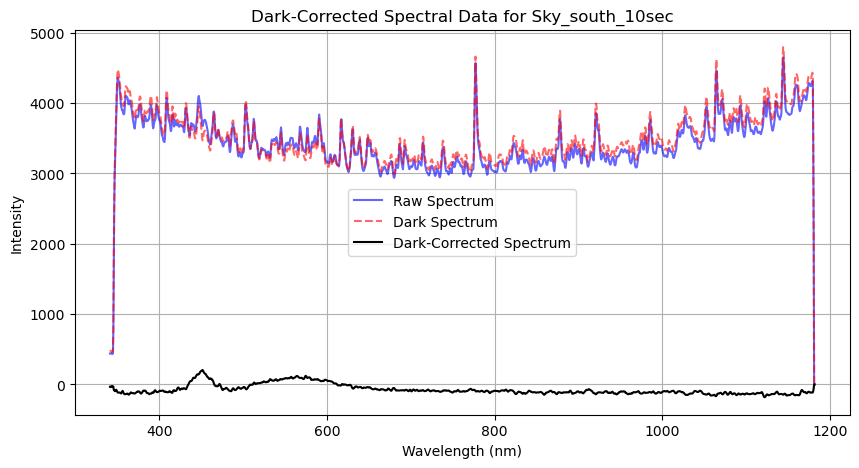

In [ ]:

# File paths
spectrum_file = "Sky_south_10sec_1.SSM"
dark_file = "Dark_10sec_1.SSM"
# Read data
wavelengths_spectrum, intensities_spectrum = read_spectrum(spectrum_file)
wavelengths_dark, intensities_dark = read_spectrum(dark_file)

# Ensure both files have the same wavelength points
if not np.array_equal(wavelengths_spectrum, wavelengths_dark):
    print("Error: Wavelengths do not match between spectrum and dark file.")
    exit()

# Perform dark subtraction
corrected_intensities = intensities_spectrum - intensities_dark

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_spectrum, intensities_spectrum, label="Raw Spectrum", color="blue", alpha=0.6)
plt.plot(wavelengths_dark, intensities_dark, label="Dark Spectrum", color="red", linestyle="dashed", alpha=0.6)
plt.plot(wavelengths_spectrum, corrected_intensities, label="Dark-Corrected Spectrum", color="black")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Dark-Corrected Spectral Data for Sky_south_10sec")
plt.legend()
plt.grid(True)
plt.show()



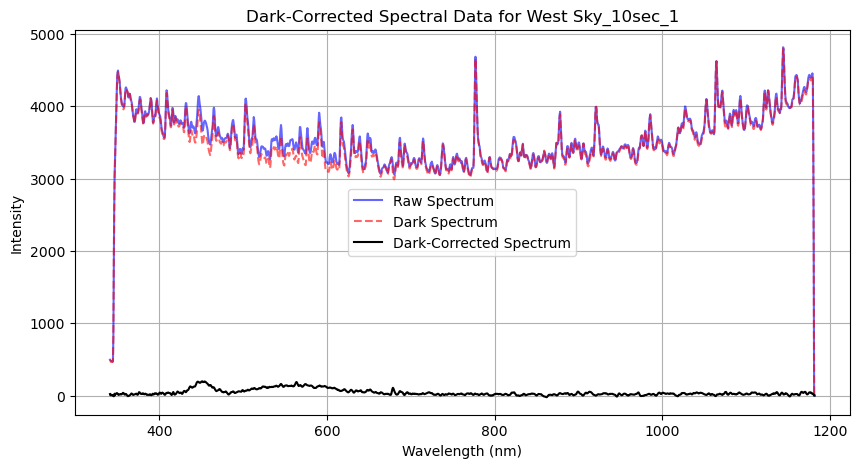

In [ ]:

# File paths
spectrum_file = "Sky_10sec_1.SSM"
dark_file = "Dark_10sec_1.SSM"
# Read data
wavelengths_spectrum, intensities_spectrum = read_spectrum(spectrum_file)
wavelengths_dark, intensities_dark = read_spectrum(dark_file)

# Ensure both files have the same wavelength points
if not np.array_equal(wavelengths_spectrum, wavelengths_dark):
    print("Error: Wavelengths do not match between spectrum and dark file.")
    exit()

# Perform dark subtraction
corrected_intensities = intensities_spectrum - intensities_dark

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_spectrum, intensities_spectrum, label="Raw Spectrum", color="blue", alpha=0.6)
plt.plot(wavelengths_dark, intensities_dark, label="Dark Spectrum", color="red", linestyle="dashed", alpha=0.6)
plt.plot(wavelengths_spectrum, corrected_intensities, label="Dark-Corrected Spectrum", color="black")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Dark-Corrected Spectral Data for West Sky_10sec_1")
plt.legend()
plt.grid(True)
plt.show()



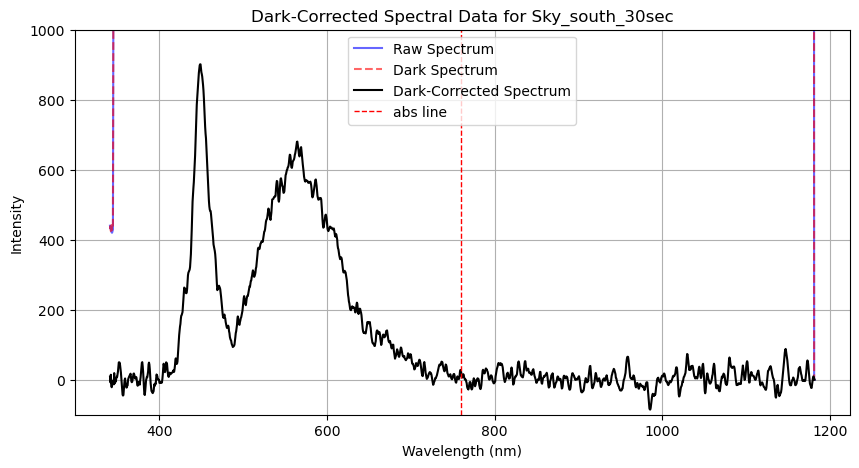

In [ ]:

# File paths
spectrum_file = "Sky_south_30sec_1.SSM"
dark_file = "dark_south_30sec_1.SSM"
# Read data
wavelengths_spectrum, intensities_spectrum = read_spectrum(spectrum_file)
wavelengths_dark, intensities_dark = read_spectrum(dark_file)

# Ensure both files have the same wavelength points
if not np.array_equal(wavelengths_spectrum, wavelengths_dark):
    print("Error: Wavelengths do not match between spectrum and dark file.")
    exit()

# Perform dark subtraction
corrected_intensities = intensities_spectrum - intensities_dark

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_spectrum, intensities_spectrum, label="Raw Spectrum", color="blue", alpha=0.6)
plt.plot(wavelengths_dark, intensities_dark, label="Dark Spectrum", color="red", linestyle="dashed", alpha=0.6)
plt.plot(wavelengths_spectrum, corrected_intensities, label="Dark-Corrected Spectrum", color="black")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Dark-Corrected Spectral Data for Sky_south_30sec")
plt.ylim(-100,1000)
plt.axvline(760, color='r', linestyle='dashed', linewidth=1, label='abs line')

plt.legend()
plt.grid(True)
plt.show()



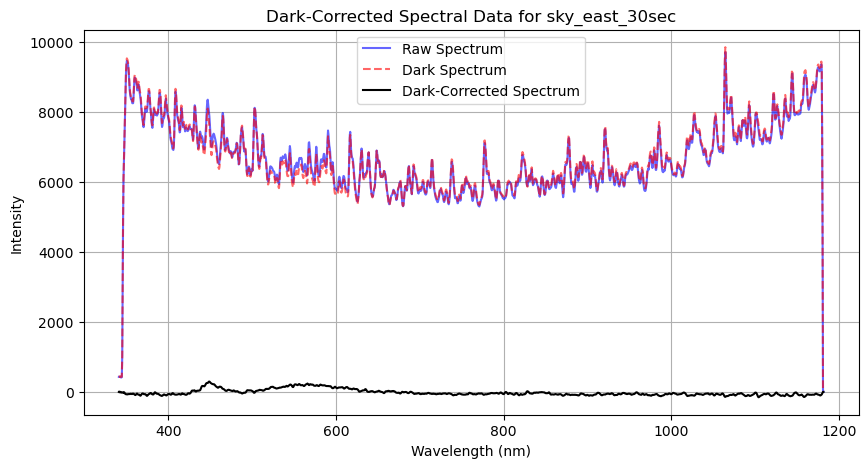

In [ ]:

# File paths
spectrum_file = "sky_east_30sec_3.SSM"
dark_file = "dark_south_30sec_1.SSM"
# Read data
wavelengths_spectrum, intensities_spectrum = read_spectrum(spectrum_file)
wavelengths_dark, intensities_dark = read_spectrum(dark_file)

# Ensure both files have the same wavelength points
if not np.array_equal(wavelengths_spectrum, wavelengths_dark):
    print("Error: Wavelengths do not match between spectrum and dark file.")
    exit()

# Perform dark subtraction
corrected_intensities = intensities_spectrum - intensities_dark

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_spectrum, intensities_spectrum, label="Raw Spectrum", color="blue", alpha=0.6)
plt.plot(wavelengths_dark, intensities_dark, label="Dark Spectrum", color="red", linestyle="dashed", alpha=0.6)
plt.plot(wavelengths_spectrum, corrected_intensities, label="Dark-Corrected Spectrum", color="black")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Dark-Corrected Spectral Data for sky_east_30sec")
plt.legend()
plt.grid(True)
plt.show()



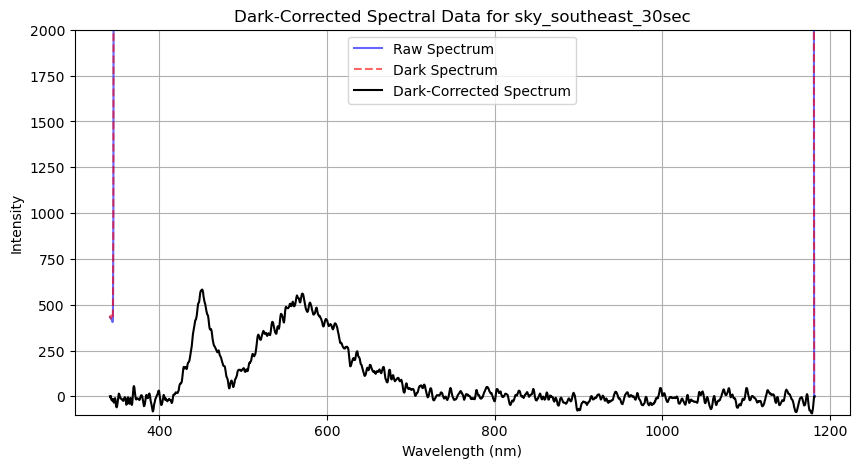

In [ ]:

# File paths
spectrum_file = "sky_southeast_30sec_1.SSM"
dark_file = "dark_south_30sec_1.SSM"
# Read data
wavelengths_spectrum, intensities_spectrum = read_spectrum(spectrum_file)
wavelengths_dark, intensities_dark = read_spectrum(dark_file)

# Ensure both files have the same wavelength points
if not np.array_equal(wavelengths_spectrum, wavelengths_dark):
    print("Error: Wavelengths do not match between spectrum and dark file.")
    exit()

# Perform dark subtraction
corrected_intensities = intensities_spectrum - intensities_dark

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_spectrum, intensities_spectrum, label="Raw Spectrum", color="blue", alpha=0.6)
plt.plot(wavelengths_dark, intensities_dark, label="Dark Spectrum", color="red", linestyle="dashed", alpha=0.6)
plt.plot(wavelengths_spectrum, corrected_intensities, label="Dark-Corrected Spectrum", color="black")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Dark-Corrected Spectral Data for sky_southeast_30sec")
plt.ylim(-100,2000)

plt.legend()
plt.grid(True)
plt.show()



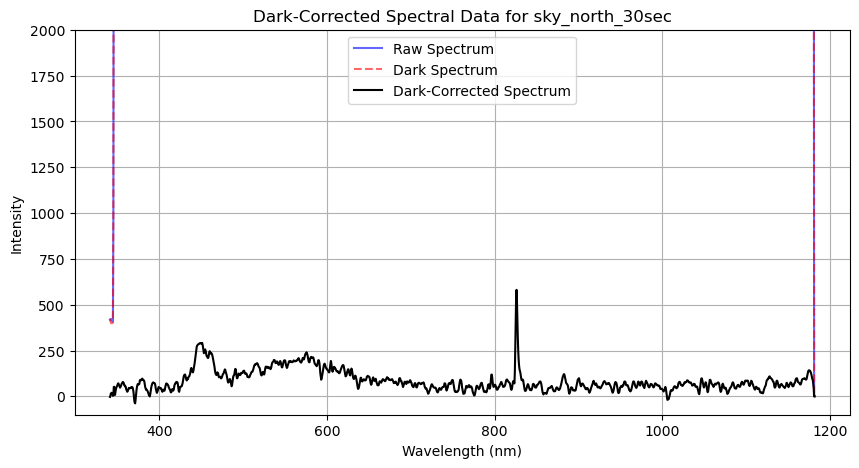

In [ ]:

# File paths
spectrum_file = "sky_north_30sec_3.SSM"
dark_file = "dark_north_30sec_3.SSM"
# Read data
wavelengths_spectrum, intensities_spectrum = read_spectrum(spectrum_file)
wavelengths_dark, intensities_dark = read_spectrum(dark_file)

# Ensure both files have the same wavelength points
if not np.array_equal(wavelengths_spectrum, wavelengths_dark):
    print("Error: Wavelengths do not match between spectrum and dark file.")
    exit()

# Perform dark subtraction
corrected_intensities = intensities_spectrum - intensities_dark

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_spectrum, intensities_spectrum, label="Raw Spectrum", color="blue", alpha=0.6)
plt.plot(wavelengths_dark, intensities_dark, label="Dark Spectrum", color="red", linestyle="dashed", alpha=0.6)
plt.plot(wavelengths_spectrum, corrected_intensities, label="Dark-Corrected Spectrum", color="black")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Dark-Corrected Spectral Data for sky_north_30sec")
plt.ylim(-100,2000)

plt.legend()
plt.grid(True)
plt.show()



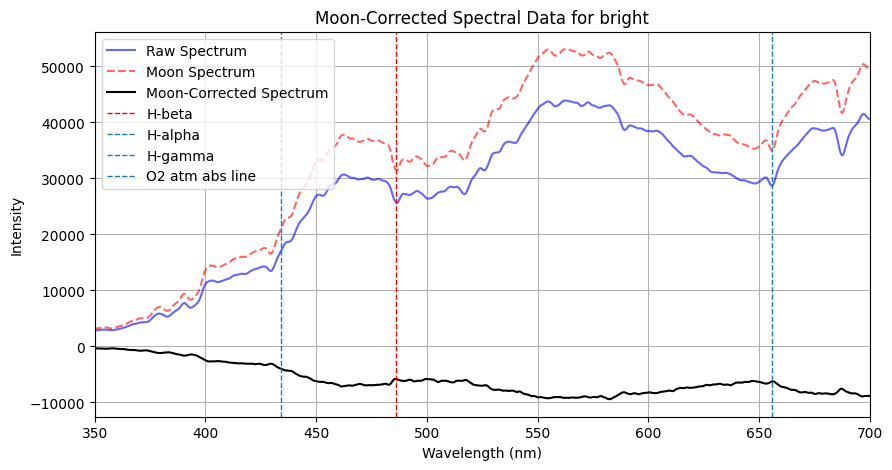

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_spectrum(file_path):
    """Reads a .ssm file and extracts wavelength and intensity."""
    wavelengths, intensities = [], []

    with open(file_path, "r") as file:
        for line in file:
            if line.startswith('"'):  # Ignore metadata lines
                continue
            parts = line.strip().split()
            if len(parts) == 2:
                try:
                    wavelength = float(parts[0])
                    intensity = float(parts[1])
                    wavelengths.append(wavelength)
                    intensities.append(intensity)
                except ValueError:
                    pass  # Skip invalid lines

    return np.array(wavelengths), np.array(intensities)

# File paths
#spectrum_file = "sirius_1sec_1.SSM"
#dark_file = "sirius_sky_1sec_1.SSM"
spectrum_file = "/content/moonbright.SSM"
dark_file = "/content/moondark.SSM"
# Read data
wavelengths_spectrum, intensities_spectrum = read_spectrum(spectrum_file)
wavelengths_dark, intensities_dark = read_spectrum(dark_file)

# Ensure both files have the same wavelength points
if not np.array_equal(wavelengths_spectrum, wavelengths_dark):
    print("Error: Wavelengths do not match between spectrum and dark file.")
    exit()

# Perform dark subtraction
corrected_intensities = intensities_spectrum - intensities_dark

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_spectrum, intensities_spectrum, label="Raw Spectrum", color="blue", alpha=0.6)
plt.plot(wavelengths_dark, intensities_dark, label="Moon Spectrum", color="red", linestyle="dashed", alpha=0.6)
plt.plot(wavelengths_spectrum, corrected_intensities, label="Moon-Corrected Spectrum", color="black")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Moon-Corrected Spectral Data for bright")
plt.axvline(486, color = 'r' , linestyle='dashed', linewidth=1, label='H-beta')
plt.axvline(656,  linestyle='dashed', linewidth=1, label='H-alpha')
plt.axvline(434,  linestyle='dashed', linewidth=1, label='H-gamma')
plt.axvline(760,  linestyle='dashed', linewidth=1, label='O2 atm abs line')

# Set x-axis limits to 350 nm to 700 nm
plt.xlim(350, 700)

plt.legend()
plt.grid()
plt.show()